# Creating bifurcation diagrams and Lyapunov exponent plots of the logistic map, Lorenz system and Mackey Glass time series


# Combined Bachelor Thesis (NS-320B), June 2022
## Mathematics & Physics and Astronomy
*'Applying Physics-informed Neural Networks to Chaotic Systems of Ordinary Differential Equations'*

**Author:** Martijn Sebastiaan Brouwer (6859488)

**Mathematics supervisors:** prof. dr. ir. C.W. Oosterlee

**Physics supervisor:** dr. J. de Graaf

**PhD supervisor:** B. Negyesi

Bifurcation diagram and Lyapunov exponents of the logistic map: $x_{n+1}=rx_n(1-x_n)$.

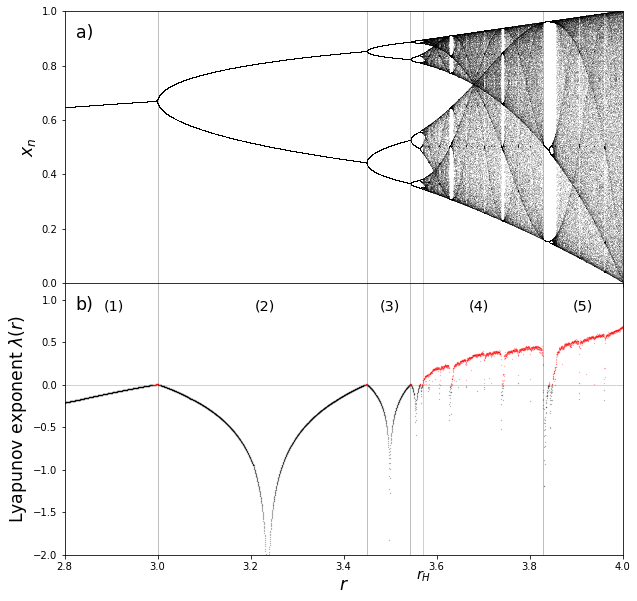

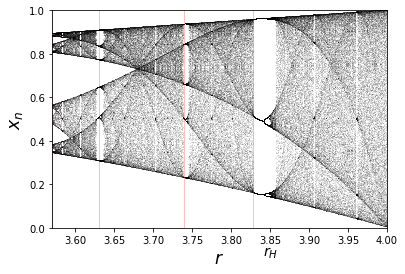

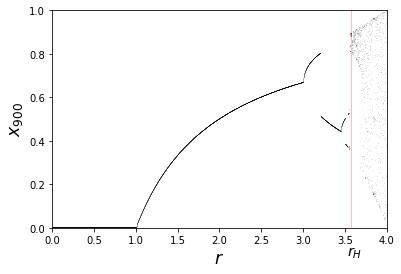

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Definition of the logistic map -----------------------------------------------
def logistic_map(r, x): return r*x*(1 - x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0)
n = 5000
r = np.linspace(2.8, 4, n)
iterations = 1000
x = (1e-6)*np.ones(n) #n-dimensional array containing the initial condition
lyapunov = np.zeros(n) #Lyapunov exponents start at 0

for i in range(iterations):
    lyapunov += np.log(abs(r - 2*r*x)) #Lyapunov exp. is defined as the scaled sum of the logs of the derivative of the equation.
    x = logistic_map(r, x) #Update current x_list

    if i >= iterations - 100: #For each of these last 100 iterations, the resulting stabilities are plotted
        ax1.plot(r, x, ',k', alpha=.1)

ax1.set_xlim(min(r),max(r))
ax1.set_ylim(0,1)
ax1.set_ylabel("$x_n$", fontsize="xx-large")
ax1.axvline(3, color='k', lw=.5, alpha=.5)
ax1.axvline(3.45, color='k', lw=.5, alpha=.5)
ax1.axvline(3.541988397679536, color='k', lw=.5, alpha=.5)
ax1.axvline(3.57, color='r', lw=.5, alpha=.5)
ax1.axvline(3.828365673134627, color='k', lw=.5, alpha=.5)
ax1.annotate("a)",xy=(0.02, 0.9),xycoords='axes fraction',fontsize="xx-large",color="k")

ax2.plot(r[lyapunov < 0], lyapunov[lyapunov <= 0]/iterations, '.k', alpha=.5, ms=.5) #Lyapunov exponents should still be scaled with the iterations (more is better)
ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov > 0]/iterations, '.r', alpha=.5, ms=.5) #Chaotic regime
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel("$r$", fontsize="xx-large")
ax2.set_ylabel("Lyapunov exponent $\\lambda(r)$", fontsize="xx-large")
ax2.set_xlim(min(r),max(r))
ax2.annotate("(1)",xy=(0.07, 0.9),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("(2)",xy=(0.34, 0.9),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("(3)",xy=(0.565, 0.9),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("(4)",xy=(0.725, 0.9),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("(5)",xy=(0.91, 0.9),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("$r_H$",xy=(0.63, -0.09),xycoords='axes fraction',fontsize="x-large",color="k")
ax2.annotate("b)",xy=(0.02, 0.9),xycoords='axes fraction',fontsize="xx-large",color="k")
ax2.axhline(0, color='r', lw=.5, alpha=.5)
ax2.axvline(3, color='k', lw=.5, alpha=.5)
ax2.axvline(3.45, color='k', lw=.5, alpha=.5)
ax2.axvline(3.541988397679536, color='k', lw=.5, alpha=.5)
ax2.axvline(3.57, color='r', lw=.5, alpha=.5)
ax2.axvline(3.828365673134627, color='k', lw=.5, alpha=.5)
plt.savefig('logistic_bifurcation.png')
plt.show()

# Plot of the chaotic regime in which the windows of periodicity are visible ---
x = (1e-6)*np.ones(n)
for i in range(iterations):
    x = logistic_map(r, x)
    if i >= iterations - 100:
        plt.plot(r, x, ',k', alpha=.1)
plt.xlim(3.57,max(r))
plt.ylim(0,1)
plt.xlabel("$r$", fontsize="xx-large")
plt.ylabel("$x_n$", fontsize="xx-large")
plt.axvline(3.57, color='r', lw=.5, alpha=.5)
plt.axvline(3.63, color='r', lw=.5, alpha=.5)
plt.axvline(3.74, color='r', lw=.5, alpha=.5)
plt.axvline(3.828365673134627, color='r', lw=.5, alpha=.5)
plt.annotate("$r_H$",xy=(0.63, -0.13),xycoords='axes fraction',fontsize="x-large",color="k")
plt.savefig('windows_of_periodicity.png')
plt.show()

# Plot of a single line to show the behaviour of the stabilities ---------------
n = 10000
x = (1e-6)*np.ones(n)
r = np.linspace(0, 4, n)
for i in range(iterations):
    x = logistic_map(r, x)
    if i == iterations - 100: #Thus only x_{900}
        plt.plot(r, x, ',k', alpha=.1)
plt.xlim(min(r),max(r))
plt.ylim(0,1)
plt.xlabel("$r$", fontsize="xx-large")
plt.ylabel("$x_{900}$", fontsize="xx-large")
plt.axvline(3.57, color='r', lw=.5, alpha=.5)
plt.annotate("$r_H$",xy=(0.88, -0.13),xycoords='axes fraction',fontsize="x-large",color="k")
plt.savefig('single_line.png')
plt.show()

# Bifurcation diagram and Lyapunov exponents of the Lorenz system.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, tf,n):
    h = tf/n
    xl,yl,zl = n*[0],n*[0],n*[0]
    xl[0],yl[0],zl[0] = x0,y0,z0
    for i in range(1,n):
        x,y,z = xl[i-1],yl[i-1],zl[i-1]

        k1x,k1y,k1z = (h*f(x,y,z)    for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k1x,k1y,k1z,h)))
        k2x,k2y,k2z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k2x,k2y,k2z,h)))
        k3x,k3y,k3z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + kr        for r,kr in zip((x,y,z),(k3x,k3y,k3z,h)))
        k4x,k4y,k4z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        
        xl[i],yl[i],zl[i] = (r + (k1r + 2*k2r + 2*k3r + k4r)/6 for r,k1r,k2r,k3r,k4r in 
                zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))
    return xl,yl,zl

def dxdt(x,y,z): return -sigma*x + sigma*y
def dydt(x,y,z): return -x*z + rho*x - y
def dzdt(x,y,z): return x*y - beta*z

def Lorenz(x0,y0,z0, sigma,rho,beta, tf,steps):
    x,y,z = RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, tf,steps)
    return x,y,z

n = 10000
iterations = 350000
sigma,beta = 10,8/3
h = 0.001
tf = h*iterations
rho_max = 350
rho = np.arange(0, rho_max, rho_max/n)
x,y,z = np.ones(n),np.ones(n),np.ones(n) #list with correct shape and initial conditions
lyapunov_x,lyapunov_y,lyapunov_z = np.zeros(n),np.zeros(n),np.zeros(n)

def plotting():
    fig = plt.figure(figsize=(13,4))
    ax = fig.add_subplot(1, 3, 1)
    ax.axhline(0, color='r', lw=.5, alpha=.5)
    ax.plot(rho[lyapunov_x < 0], lyapunov_x[lyapunov_x < 0]/iterations, '.k', alpha=.5, ms=.5)
    ax.plot(rho[lyapunov_x >= 0], lyapunov_x[lyapunov_x >= 0]/iterations, '.r', alpha=.5, ms=.5)
    ax.set_xlim(min(rho), max(rho))
    ax.set_ylim(-50, 10)
    ax.set_xlabel('$\\rho$', fontsize="x-large")
    ax.set_ylabel('Lyapunov exponent of  $x$', fontsize="x-large")

    ax = fig.add_subplot(1, 3, 2)
    ax.axhline(0, color='r', lw=.5, alpha=.5)
    ax.plot(rho[lyapunov_y < 0], lyapunov_y[lyapunov_y < 0]/iterations, '.k', alpha=.5, ms=.5)
    ax.plot(rho[lyapunov_y >= 0], lyapunov_y[lyapunov_y >= 0]/iterations, '.r', alpha=.5, ms=.5)
    ax.set_xlim(min(rho), max(rho))
    ax.set_ylim(-50, 10)
    ax.set_xlabel('$\\rho$', fontsize="x-large")
    ax.set_ylabel('Lyapunov exponent of $y$', fontsize="x-large")

    ax = fig.add_subplot(1, 3, 3)
    ax.axhline(0, color='r', lw=.5, alpha=.5)
    ax.plot(rho[lyapunov_z < 0], lyapunov_z[lyapunov_z < 0]/iterations, '.k', alpha=.5, ms=.5)
    ax.plot(rho[lyapunov_z >= 0], lyapunov_z[lyapunov_z >= 0]/iterations, '.r', alpha=.5, ms=.5)
    ax.set_xlim(min(rho), max(rho))
    ax.set_ylim(-50, 10)
    ax.set_xlabel('$\\rho$', fontsize="x-large")
    ax.set_ylabel('Lyapunov exponent of $z$', fontsize="x-large")
    plt.tight_layout()
    plt.savefig('Lyapunov_exp.png')
    plt.show()


for i in range(iterations):
    k1x,k1y,k1z = h*dxdt(x,y,z),h*dydt(x,y,z),h*dzdt(x,y,z)
    k2x,k2y,k2z = h*dxdt(x+k1x/2,y+k1y/2,z+k1z/2),h*dydt(x+k1x/2,y+k1y/2,z+k1z/2),h*dzdt(x+k1x/2,y+k1y/2,z+k1z/2)
    k3x,k3y,k3z = h*dxdt(x+k2x/2,y+k2y/2,z+k2z/2),h*dydt(x+k2x/2,y+k2y/2,z+k2z/2),h*dzdt(x+k2x/2,y+k2y/2,z+k2z/2)
    k4x,k4y,k4z = h*dxdt(x+k3x,y+k3y,z+k3z),h*dydt(x+k3x,y+k3y,z+k3z),h*dzdt(x+k3x,y+k3y,z+k3z)
    x,y,z = x+(k1x+2*k2x+2*k3x+k4x)/6,y+(k1y+2*k2y+2*k3y+k4y)/6,z+(k1z+2*k2z+2*k3z+k4z)/6

    lyapunov_x += np.log(abs(-sigma*x + sigma*y))
    lyapunov_y += np.log(abs(-x*z + rho*x - y))
    lyapunov_z += np.log(abs(x*y - beta*z))
    if i%50000 == 0:
        print('Iteration', i)
        print(rho[lyapunov_x >= 0][0])
        print(rho[lyapunov_x >= 0][0])
        print(rho[lyapunov_x >= 0][0])
        print(max(lyapunov_x)/iterations)
        print(max(lyapunov_y)/iterations)
        print(max(lyapunov_z)/iterations)
        plotting()

rho_list = np.arange(0, rho_max, rho_max/n)
x0,y0,z0 = 1,1,1
rx_maxes,x_maxes,rx_mins,x_mins = [],[],[],[]
ry_maxes,y_maxes,ry_mins,y_mins = [],[],[],[]
rz_maxes,z_maxes,rz_mins,z_mins = [],[],[],[]
for rho in rho_list:
    print('Current rho:', rho)
    x,y,z = Lorenz(x0,y0,z0, sigma,rho,beta, tf,n)
    x,y,z = np.array(x),np.array(y),np.array(z)
    for i in range(1, len(z) - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:         # save the local maxima
            rx_maxes.append(rho)
            x_maxes.append(x[i])
        elif x[i - 1] > x[i] and x[i] < x[i + 1]:       # save the local minima
            rx_mins.append(rho)
            x_mins.append(x[i])
        
        if y[i - 1] < y[i] and y[i] > y[i + 1]:         # save the local maxima
            ry_maxes.append(rho)
            y_maxes.append(y[i])
        elif y[i - 1] > y[i] and y[i] < y[i + 1]:       # save the local minima
            ry_mins.append(rho)
            y_mins.append(y[i])

        if z[i - 1] < z[i] and z[i] > z[i + 1]:         # save the local maxima
            rz_maxes.append(rho)
            z_maxes.append(z[i])
        elif z[i - 1] > z[i] and z[i] < z[i + 1]:       # save the local minima
            rz_mins.append(rho)
            z_mins.append(z[i])
        
        x0,y0,z0 = x[i],y[i],z[i]

fig = plt.figure(figsize=(13,4))
plt.subplots_adjust(hspace=0)
ax = fig.add_subplot(1, 3, 1)
ax.scatter(rx_maxes, x_maxes, color="r", s=0.5, alpha=0.1)
ax.scatter(rx_mins, x_mins, color="k", s=0.5, alpha=0.1)
ax.set_xlim(min(rho_list), max(rho_list))
ax.set_ylabel('$x$', fontsize="x-large")
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.axvline(470/19, color='r', lw=.5, alpha=.5)
ax.annotate("$\\rho_H$",xy=(0.05, -0.09),xycoords='axes fraction',fontsize="x-large",color="k")

ax = fig.add_subplot(1, 3, 2)
ax.scatter(ry_maxes, y_maxes, color="r", s=0.5, alpha=0.1)
ax.scatter(ry_mins, y_mins, color="k", s=0.5, alpha=0.1)
ax.set_xlim(min(rho_list), max(rho_list))
ax.set_ylabel('$y$', fontsize="x-large")
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.axvline(470/19, color='r', lw=.5, alpha=.5)
ax.annotate("$\\rho_H$",xy=(0.05, -0.09),xycoords='axes fraction',fontsize="x-large",color="k")

ax = fig.add_subplot(1, 3, 3)
ax.scatter(rz_maxes, z_maxes, color="r", s=0.5, alpha=0.1)
ax.scatter(rz_mins, z_mins, color="k", s=0.5, alpha=0.1)
ax.set_xlim(min(rho_list), max(rho_list))
ax.set_ylabel('$z$', fontsize="x-large")
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.axvline(470/19, color='r', lw=.5, alpha=.5)
ax.annotate("$\\rho_H$",xy=(0.05, -0.09),xycoords='axes fraction',fontsize="x-large",color="k")
plt.tight_layout()
plt.savefig('Bifurcation_diagram.png')
plt.show()

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1, 3, 1)
ax.axhline(0, color='r', lw=.5, alpha=.5)
ax.plot(rho[lyapunov_x < 0], lyapunov_x[lyapunov_x < 0]/iterations, '.k', alpha=.5, ms=.5)
ax.plot(rho[lyapunov_x >= 0], lyapunov_x[lyapunov_x >= 0]/iterations, '.r', alpha=.5, ms=.5)
ax.set_xlim(min(rho), max(rho))
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.set_ylabel('Lyapunov exponent of  $x$', fontsize="x-large")

ax = fig.add_subplot(1, 3, 2)
ax.axhline(0, color='r', lw=.5, alpha=.5)
ax.plot(rho[lyapunov_y < 0], lyapunov_y[lyapunov_y < 0]/iterations, '.k', alpha=.5, ms=.5)
ax.plot(rho[lyapunov_y >= 0], lyapunov_y[lyapunov_y >= 0]/iterations, '.r', alpha=.5, ms=.5)
ax.set_xlim(min(rho), max(rho))
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.set_ylabel('Lyapunov exponent of $y$', fontsize="x-large")

ax = fig.add_subplot(1, 3, 3)
ax.axhline(0, color='r', lw=.5, alpha=.5)
ax.plot(rho[lyapunov_z < 0], lyapunov_z[lyapunov_z < 0]/iterations, '.k', alpha=.5, ms=.5)
ax.plot(rho[lyapunov_z >= 0], lyapunov_z[lyapunov_z >= 0]/iterations, '.r', alpha=.5, ms=.5)
ax.set_xlim(min(rho), max(rho))
ax.set_xlabel('$\\rho$', fontsize="x-large")
ax.set_ylabel('Lyapunov exponent of $z$', fontsize="x-large")
plt.tight_layout()
plt.savefig('Lyapunov_exp2.png')
plt.show()

# Bifurcation diagram and Lyapunov exponents of the Mackey Glass time series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RungeKutta(dxdt, x0, tf, n): #Specify derivatives, initial conditions and time
    h = tf/n   #Stepsize
    xl = n*[0] #Create lists for output
    xl[0] = x0 #First element in outputlist is initial condition
    for i in range(1,n): #Loop over steps while skipping the first one due to the initial condition
        x_t = xl[i-1]
        if i-1 >= n/tf*tau: #Determining the delation time
            x_t_minus_tau = xl[int(i-1-n/tf*tau)]
        else: 
            x_t_minus_tau = 0 #The dilation term 

        #Going through the four RK4 equations:
        k1x = h*dxdt(x_t, x_t_minus_tau)
        xs  = x_t + 0.5*k1x
        xs_minus_tau = x_t_minus_tau + 0.5*k1x
        k2x = h*dxdt(xs, xs_minus_tau)
        xs  = x_t + 0.5*k2x  
        xs_minus_tau = x_t_minus_tau + 0.5*k2x
        k3x = h*dxdt(xs, xs_minus_tau)
        xs  = x_t + k3x
        xs_minus_tau = x_t_minus_tau + k3x
        k4x = h*dxdt(xs, xs_minus_tau)
        #Update last next value in output list:
        xl[i] = x_t + (k1x + 2*k2x + 2*k3x + k4x)/6 
    return xl

# Mackey Glass time series DE -------------------------------------------------
def MG(x_t, x_t_minus_tau):
    return a*x_t_minus_tau/(1 + x_t_minus_tau**10) - b*x_t

def Mackey_Glass(MG, x0, a,b,tau, tf,steps):
    x = RungeKutta(MG, x0, tf, steps)
    return x

# Parameters ------------------------------------------------------------------
x0  = 0.1               #Initial conditions
a,b = 0.2,0.1          #Parameters of the system
ti  = 0                 #Initial time
tf  = 600               #Starting final time (without update)
n   = 1000               #Steps taken between ti and tf
h   = 0.001              #Step size of each step of n
tau_max = 75
iterations = 10000
tau = np.arange(0, tau_max, tau_max/n)
x_t = x0*np.ones(n)    #list with correct shape and containing the initial conditions
x_t = x_t.tolist()
lyapunov = np.zeros(n) #Lyapunov exponents of correct dimension starting at 0
x_t_saves = [] 
# for i in range(n):  
#     x_t_saves.append(x_t)

# for i in range(iterations):
#     x_t_minus_tau = [x_t_saves[t][t] for t in range(n)]
#     for t in range(1,n):
#         if x_t_minus_tau[-t] == x_t_minus_tau[-t-1]:
#             x_t_minus_tau[-t] = 0

#     k1x = h*MG(x_t, x_t_minus_tau)
#     xs  = x_t + 0.5*k1x
#     xs_minus_tau = x_t_minus_tau + 0.5*k1x
#     k2x = h*MG(xs, xs_minus_tau)
#     xs  = x_t + 0.5*k2x  
#     xs_minus_tau = x_t_minus_tau + 0.5*k2x
#     k3x = h*MG(xs, xs_minus_tau)
#     xs  = x_t + k3x
#     xs_minus_tau = x_t_minus_tau + k3x
#     k4x = h*MG(xs, xs_minus_tau)
#     x_t = x_t + (k1x + 2*k2x + 2*k3x + k4x)/6
#     x_t_saves[i+1] = x_t

#     lyapunov += np.log(abs(a*x_t_minus_tau/(1 + x_t_minus_tau**10) - b*x_t))

#     if i%1000 == 0:
#         print('Iteration:', i)

# print('Chaotic regime:', tau[lyapunov >= 0])
# print('Max lyapunox exponent of $x$ =', max(lyapunov)/iterations)

steps = 5000
tau_list = np.arange(0, tau_max, tau_max/steps)
x0 = 0.1
tx_maxes,x_maxes,tx_mins,x_mins = [],[],[],[]
for tau in tau_list:
    print('Current tau:', tau)
    x = Mackey_Glass(MG, x0, a,b,tau, tf,steps)
    x = np.array(x)
    for i in range(1, len(x) - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:         # save the local maxima
            tx_maxes.append(tau)
            x_maxes.append(x[i])
        elif x[i - 1] > x[i] and x[i] < x[i + 1]:       # save the local minima
            tx_mins.append(tau)
            x_mins.append(x[i])
        
        x0 = x[i]

n = 10
C = ((a - b)/b)**(1/n)
F_der = (1 + C**n - n*C**n)/(1+C**n)**2
tau_H = np.arccos(b/(a*F_der))/(np.sqrt((a*F_der)**2-b**2))
print('Hopf_bifurcation value =', tau_H)

plt.figure()
plt.scatter(tx_maxes, x_maxes, color="r", s=0.5, alpha=0.1)
plt.scatter(tx_mins, x_mins, color="k", s=0.5, alpha=0.1)
plt.xlim(min(tau_list), 60)
plt.ylabel('$P(t)$', fontsize="x-large")
plt.xlabel('$\\tau$', fontsize="x-large")
plt.axvline(tau_H, color='r', lw=.5, alpha=.5)
plt.annotate("$\\tau_H$",xy=(0.05, -0.09),xycoords='axes fraction',fontsize="x-large",color="k")
plt.savefig('MG_bifurcation.png')

# fig = plt.figure(figsize=(13,4))
# ax = fig.add_subplot(1, 3, 1)
# ax.axhline(0, color='r', lw=.5, alpha=.5)
# ax.plot(tau[lyapunov < 0], lyapunov[lyapunov < 0]/iterations, '.k', alpha=.5, ms=.5)
# ax.plot(tau[lyapunov >= 0], lyapunov[lyapunov >= 0]/iterations, '.r', alpha=.5, ms=.5)
# ax.set_xlim(min(tau), max(tau))
# # ax.set_ylim(-20,20)
# ax.set_xlabel('$\\tau$', fontsize="x-large")
# ax.set_ylabel('Lyapunov exponent of $x$', fontsize="x-large")